# OULAD Analysis - Phuc Pham

 # 1. Scope of work

This work aims at exploring and analyzing the Learning Analytics data of Open University (OULAD) obtain certain hindsights. I will use Python to transformed data then load data into PowerBI to make dashboard. Then I will apply machine learning to find out if we could predict the final result of the students based on their demographic and their encounter with courses' materials

# 2. Extract data

The OULAD dataset consists of 7 csv files: course.csv, assessment.csv, vle.csv, studentInfo.csv, studentRegistration.csv, studentAssessment.csv, studentVle.csv

These files can be downloaded at: https://analyse.kmi.open.ac.uk/open_dataset

# 3. Transform data

Prior to load data into PowerBi for building dashboard for analytic activities, data will be explored and transformed using Python 

In [2]:
#import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [76]:
#load data
course = pd.read_csv('courses.csv')
assessment = pd.read_csv('assessments.csv')
stu_assessment = pd.read_csv('studentAssessment.csv')
stu_info = pd.read_csv('studentInfo.csv')
stu_reg = pd.read_csv('studentRegistration.csv')
vle = pd.read_csv('vle.csv')
stu_vle = pd.read_csv('studentVle.csv')

### I. Describe and Exploring data

#### 1. Course data

There are 7 different modules with presentations in 4 presentation codes indicates the year 2013 or 2014 and the starting month of the presentation February or October presented by J or B in code_presentation. The average length of the presentation is 255 days with the range from 234 to 269 days.

In [11]:
#Describe course data
course.info()
print("Code module: " + str(course.code_module.unique()))
print(course.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
Code module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000


#### 2. Assessment data

There are 206 assessments in total categorize into three type: Exam, Tutor Marked Assessment (TMA) and Computer Marked Assessment (CMA)

In [14]:
#Describe assessment data
assessment.info()
print("Assessment type: " + str(assessment.assessment_type.unique()))
assessment.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
Assessment type: ['TMA' 'Exam' 'CMA']


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


#### 3. Student Information data

There are 28785 unique students; however many of the registered in multiple module and presentation including potential several attempts; therefore, there are 32593 records in total. 

The demographic of students involve 6 factors:

    - Sex: Female(F), Male(M) 
    
    - Region: East Anglian Region; Scotland; North Western Region; South East Region; West Midlands Region; Wales; North Region; South Region; Ireland; South West Region; East Midlands Region; Yorkshire Region; London Region.
    
    - Highest Education: HE Qualification; A Level or Equivalent; Lower Than A Level; Post Graduate Qualification; No Formal quals.
    
    - IMD band: 0-10%; 10-20%; 20-30%; 30-40%; 40-50%; 50-60%; 60-70%; 70-80%; 80-90%; 90-100%
    
    - Age band: 0-35; 35-55; 55<=
    
    - Disability status: with disability (Y), without disability (N)

In [20]:
#Describe Student Information data
stu_info.info()
print(stu_info.describe())
print("Number of unique student: " + str(stu_info.id_student.nunique()))
print("IMD band: " + str(stu_info.imd_band.unique()))
print("Highest Education: " + str(stu_info.highest_education.unique()))
print("Region: " + str(stu_info.region.unique()))
print("Age band: " + str(stu_info.age_band.unique()))
stu_info.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05    

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


#### 4. Student Registration Data

Student Registration contains data on the time students start and withdrawn from the presentation. Null value in data_unregistration column indicates students who fully completed the presentation. The average days from begining of the presentation to the day a student withdrawn is roundly 50 days while the students averagely registered for presentation 69 days before the presentations start.

In [33]:
stu_reg.info()
print(stu_reg.describe())
stu_reg.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


#### 5. Student Assessment Data

The 25th, 50th and 75th percentile of score is 65, 80, 90 respectively with the lowest score is 0 and the highest is 100. There are 173 null records for score, it might indicate these are score from withdrawn students, therefore I will delete these records from the dataset later in Transformation part.

In [31]:
#Describe student assement data
stu_assessment.info()
print(stu_assessment.describe())
stu_assessment.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05 

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


#### 6. Virtual Learning Environment Data

There are 6364 different sites with 20 distinct activity types: resource; oucontent; url; homepage; subpage; glossary; forumng; oucollaborate; dataplus; quiz; ouelluminate; sharedsubpage; questionnaire; page; externalquiz; ouwiki; dualpane; repeatactivity; folder; htmlactivity.

In [38]:
vle.info()
print(vle.activity_type.unique())
#print(vle.describe())
vle.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
['resource' 'oucontent' 'url' 'homepage' 'subpage' 'glossary' 'forumng'
 'oucollaborate' 'dataplus' 'quiz' 'ouelluminate' 'sharedsubpage'
 'questionnaire' 'page' 'externalquiz' 'ouwiki' 'dualpane'
 'repeatactivity' 'folder' 'htmlactivity']


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


#### 7. Student VLE Data

This dataset is huge with 10,655,279 records indicates the total clicks students perform on specific site.

In [39]:
stu_vle.info()
stu_vle.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


## II. Transform data

#### 1. Transform individual dataset

a. Create starting_month column for course dataset

In [77]:
#Adding starting_month column
course['starting_month'] = list(map(lambda x: 'Feb' if x[-1] == 'B' else 'Oct', course.code_presentation))

b. Create course_combination_key for course, assessment, stu_info and vle for joining table and setting relationship in PowerBI

In [78]:
#create a combination course key from code module and code presentation
course['combination_course_key'] = course['code_module'] + course['code_presentation']
assessment['combination_course_key'] = assessment['code_module'] + assessment['code_presentation']
stu_info['combination_course_key'] = stu_info['code_module'] + stu_info['code_presentation']
vle['course_combination_key'] = vle['code_module'] + vle['code_presentation']
stu_vle['course_combination_key'] = stu_vle['code_module'] + stu_vle['code_presentation']

c. Create course_student_combination_key for stu_info, and stu_vle for joining table and setting relationship in PowerBI.

In [79]:
#Change type of id_student
stu_info = stu_info.astype({'id_student':str})
stu_vle = stu_vle.astype({'id_student':str})
stu_info['course_student_combination_key'] = stu_info['code_module'] + stu_info['code_presentation'] + stu_info['id_student']
stu_vle['course_student_combination_key'] = stu_vle['code_module'] + stu_vle['code_presentation'] + stu_vle['id_student']

d. Drop null value in stu_assessment data

In [80]:
#Drop null value record
stu_assessment.dropna(subset = ["score"], inplace=True)


#### 2. Join dataset for PowerBI

a. Join assessment and stu_assessment data

In [81]:
stu_assessment_master = pd.merge(stu_assessment, assessment, how="left", on="id_assessment")

a.1 Create course_student_combination_key for stu_assessment_master for joining table and setting relationship in PowerBI.

In [82]:
stu_assessment_master = stu_assessment_master.astype({'id_student':str})
stu_assessment_master['course_student_combination_key'] = stu_assessment_master['code_module'] + stu_assessment_master['code_presentation'] + stu_assessment_master['id_student']

b. Join stu_info and stu_reg data

In [83]:
stu_reg = stu_reg.astype({'id_student':str})
stu_master = pd.merge(stu_info, stu_reg, how="left", on=["code_module","code_presentation", "id_student"])

#### 3. Export data to csv and load into PowerBI

In [84]:
course.to_csv('course_transformed.csv')
stu_assessment_master.to_csv("student_assessment_master.csv")
stu_master.to_csv("studentInfo_transformed.csv")
vle.to_csv("vle_transformed.csv")
stu_vle.to_csv('studentVle_transformed.csv')

In [85]:
stu_master.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,combination_course_key,course_student_combination_key,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA2013J,AAA2013J11391,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA2013J,AAA2013J28400,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA2013J,AAA2013J30268,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA2013J,AAA2013J31604,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA2013J,AAA2013J32885,-176.0,NaN


# 4. Load Data into PowerBI

Using transformed data I have created a dashboard in PowerBi. Please follow the link to access PowerBI

Link: https://drive.google.com/file/d/1PcxzLq87EG9AJuW9QaHeJxhIY8lnLdbb/view?usp=sharing

# 5. Data Analysis Findings

## I. General Findings

Presentation
- Presentation start in October is generally longer than those start in February

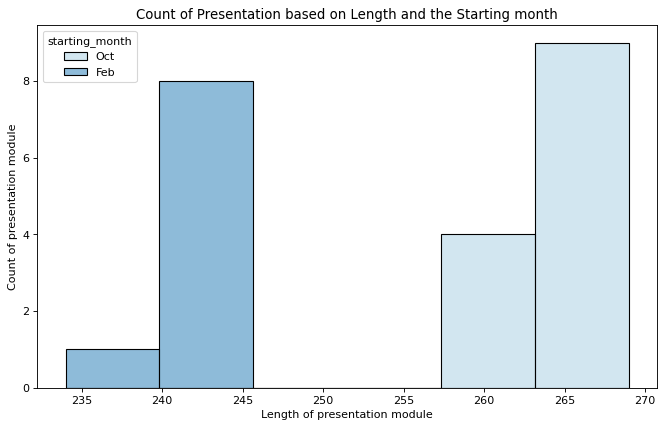

In [617]:
#Exploring course data with visualisation
figure(figsize=(10, 6), dpi=80)
sns.set_palette("Paired")
sns.histplot(x=course.module_presentation_length, hue=course.starting_month, data=course)
plt.title("Count of Presentation based on Length and the Starting month")
plt.xlabel("Length of presentation module")
plt.ylabel("Count of presentation module")
plt.show()


Assessment
- Computer Marked Assessment have larger amount of assessment with maximum score of 100. Exclude outliers the data is multinominal and left-skewed like distribution.
- Tutor Marked Assessment score is also left-skewed distribution while Exam score excluding outliers is normal distribution.

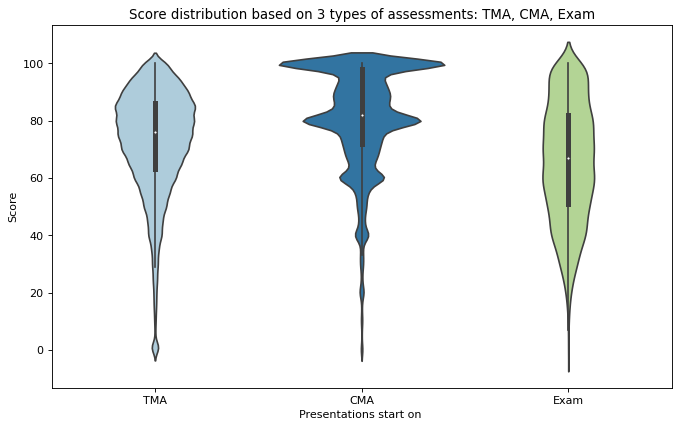

<Figure size 432x288 with 0 Axes>

In [620]:
figure(figsize=(10, 6), dpi=80)
sns.set_palette("Paired")
sns.violinplot(y="score", x="assessment_type", data=stu_assessment_master )
plt.title("Score distribution based on 3 types of assessments: TMA, CMA, Exam")
plt.xlabel("Presentations start on ")
plt.ylabel("Score")
plt.show()
plt.clf()

Student Demographic
- There are slightly more male students than female students
- Students with disability made up 9.71% of all students
- Two third of student population is under 35 years old, the rest is from 35-55 while there is only 0.66% is 55 or older.
- Most students have their highest education as "A Level or Equivalent" and "Lower Than A Level".
- Scotland is the region has the largest amount of student participated while Ireland has the lowest.
- There are generally not many significances about the proportion of student based on their IMD band.

Student Final Result
- The withdrawn rate is relatively high 31.16% and half of the student fail or drop the presentation.

## II. Specific Findings

### Demographic

#### Gender
- There is no difference in performance of students based on their gender.

#### Disability status
* Students with disability have a higher withdraw and fail rate as well as lower score on average compared to students without disability.
    - Roundly 62% students with disability fail or withdraw from presentation while only nearly 55% of students without disability fall in the same group for presentations start in February.
    - Roundly 60% students with disability fail or withdraw from presentation while only nearly 49% of students without disability fall in the same group for presentations start in October.
    - On average students with disability score only 73.39-73.75 compared to 75.99-76.04.

#### Age
- The older students seem to have higher score and better performance - higher distinction and pass rate - than younger students.
    - 55 years or older students have distinction rate and pass rate range from 12.5-21.25% and 41.88-44.64% depend on courses start in February or October while distinction rate and pass rate for 35 years or younger students range from 7.92-8.14% and 33.62-38.98% respectively.
    - On average 55 years or older students score 79.27-79.84 compared to average score of 35 years or younger 74.95-75.01 depending on courses start in Februrary or October.

#### Highest Education
- While Post Graduate students made up a small amount of student population, they outperform their peers in score, pass rate and distinction rate 
    - Post Graduate students pass rate and distinction rate remain the highest among Highest Education group with rate ranging from 37.02-37.88% and 28.03-28.18% respectively.
- Students with higher education are observed to perform better and less likely to withdraw from the presentation.

#### IMD 
- Students with lower IMD band are generally have lower pass rate. 

#### Region
- There is no difference in performance of students based on their regions

### Final Result
- Students who failed or withdrew seemed to partcipate on virtual learning environment less on average compared to those who passed or had distinction results.


## 6. Machine Learning application
As exploring through the OULAD dataset, I posed a question whether based on student demograpgic as well as their participation at the early stage of the presentation we can predict the final result of that student. Therefore, I tried K Neareast Neighborhood method and evaluate if this method work out well with this dataset.

In [86]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce

In [498]:
#Encoding categorical data in stu_info into numeric data for machine learning purpose


#Encode imd_band column
encoder = ce.OrdinalEncoder(cols=['imd_band'], return_df=True, mapping=[{'col':'imd_band', 'mapping':{'0-10%':0, '10-20':1,'20-30%':2, '30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9}}])
ml = encoder.fit_transform(stu_master)

#Encode age_band column
encoder = ce.OrdinalEncoder(cols=['age_band'], return_df=True, mapping=[{'col':'age_band', 'mapping':{'0-35':0,'35-55':1,'55<=':2}}])
ml = encoder.fit_transform(ml)

#Encode highest_education
encoder = ce.OrdinalEncoder(cols=['highest_education'], return_df=True, mapping=[{'col':'highest_education', 'mapping':{'No Formal quals':0,'Lower Than A Level':1,'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4}}])
ml = encoder.fit_transform(ml)

#Encode gender 
encoder = ce.OneHotEncoder(cols='gender', handle_unknown='return_nan',return_df=True, use_cat_names=True)
ml = encoder.fit_transform(ml)

#Encode disability
encoder = ce.OneHotEncoder(cols='disability', handle_unknown='return_nan',return_df=True, use_cat_names=True)
ml = encoder.fit_transform(ml)

#Encode region
encoder = ce.OneHotEncoder(cols='region', handle_unknown='return_nan',return_df=True, use_cat_names=True)
ml = encoder.fit_transform(ml)



C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Find average click by student in specific presentation (I groupby course_student_combination_key) in 50 days from the begining of the course. Since 50 is the average days that students withdrew from the presentation, it would be reasonable to narrow down the data in 50 days beginning from the presentation.

In [499]:
# Find average click
click = stu_vle[stu_vle['date'] < 50].sum_click.groupby(stu_vle.course_student_combination_key).mean().reset_index(name="avg_click")
click.head(5)

,course_student_combination_key,avg_click
0,AAA2013J100893,3.045045
1,AAA2013J101781,6.092199
2,AAA2013J102806,3.086066
3,AAA2013J102952,4.153846
4,AAA2013J1035023,3.634615


Left join ml with course table to include the length of the courses for machine learning application. Then left join with click table to include average click.

In [501]:
ml = pd.merge(ml, course, how="left", on=["code_module","code_presentation","combination_course_key"])

In [503]:
ml = pd.merge(ml, click, how="left", on=["course_student_combination_key"])

In [507]:
#Drop all records have null for avg_click column
ml.dropna(subset = ["avg_click"], inplace=True)

Then I find out the earliest assessment and score of student (groupby course_student_combination_key) to include score as a variable in machine learning application.

In [527]:
#Group the student assessment master data  by course_student_combination_key by the minimum date
a = stu_assessment_master.date.groupby(stu_assessment_master.course_student_combination_key).min().reset_index()
a.head(5)

earliest_test = pd.merge(a, stu_assessment_master, how="left", on=["course_student_combination_key","date"])
earliest_test = earliest_test[["course_student_combination_key","id_assessment","score"]]

In [537]:
ml_data = pd.merge(ml, earliest_test, how="left", on="course_student_combination_key")

In [539]:
#drop null data 
ml_data.dropna(subset = ["score"], inplace=True)

Create training and testing data for machine learning application

In [542]:
x = ml_data[["score","module_presentation_length","avg_click","studied_credits"]]
y = ml_data[["final_result"]]

x_train, x_test, label, label_test = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=6)

Creating Classifier to predict final result of student based on their average clicks on virtual learning environment materials, number of credits studied, the module presentation length and the score of the first test using K Nearest Neighbors method.

In [547]:
#Create classifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, label)
#Evaluate the accuracy of classifier

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

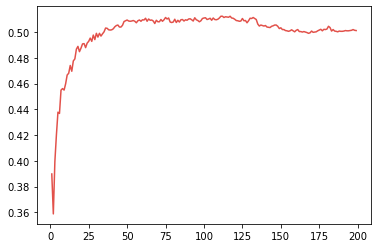

<Figure size 432x288 with 0 Axes>

In [546]:
#Find the best k for method to optimize the accuracy of the classifier
score = []
for i in range(1,200):
    classifier3 = KNeighborsClassifier(i)
    classifier3.fit(x3_train, label3)
    score.append(classifier3.score(x3_test, label_test3))

sns.lineplot(x=range(1,200), y=score)
plt.show()
plt.clf()

According to the K-graph, the accuracy of the classifier can be up to 50% with k around 100

In [570]:
#Create classifier
classifier = KNeighborsClassifier(113)
classifier.fit(x_train, label)
classifier.score(x_test, label_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5043834015195792

#### Conclusion

The classification above can predict up to 50%, twice higher than normal prediction 25% of four final results, based on the average clicks on virtual learning environment materials, number of credits studied, the module presentation length and the score of the first test. It is also interesting to find out that the classifier might be more accurate for some course module than some others. For instance, above classification using only module "AAA" data have the score of 0.65.

In [615]:
### AAA module
aml = ml_data[ml_data["code_module"] == "AAA"]
ax = aml[["score","module_presentation_length","avg_click","studied_credits"]]
alabel = aml[["final_result"]]

ax_train, ax_test, alabel, alabel_test = train_test_split(ax,alabel, train_size=0.8, test_size=0.2, random_state=6)

In [616]:
a_classifier = KNeighborsClassifier(30)
a_classifier.fit(ax_train, alabel)
a_classifier.score(ax_test, alabel_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6524822695035462

## 7. What I have tried but did not work out

At first I thought student demographic will heavily affect the final result of the students; therefore, I used them for the ML model. Nevertheless, the score of these ML models is relatively low (0.35-0.40). Later, I use only data on student's participation of the presentation and data of the presentation itself, the accuracy of ML model is pretty impressive.

## 8. More Ideas

- Include demographic data into current ML model to evaluate if this combination can improve the accuracy.
- Re-design the model by calculating average clicks per student from the day they start to the day they end instead of calculating average clicks in the first 50 days of the presentation.